# Identify neighbours

## Imports

In [1]:
import pandas as pd
import warnings
import networkx as nx

from src.data.utils import (
    get_general_path, join_paths, save_as_pickle
)

## Constants

## Config

In [3]:
warnings.filterwarnings('ignore')

## Functions

In [4]:
def get_intersections_as_list(geom, df):
    """Assumes that df has a geometry column that may or not intersect"""
    mun_id_list = df[geom.intersects(df.geometry)].index.to_list()
    return mun_id_list

## Read data

In [5]:
general_path = get_general_path()
municipal_data_path = join_paths(general_path, INTERIM_DATA_PATH, MUNI_DATA_FILE)
municipal_data = pd.read_pickle(municipal_data_path)

## Process data

In [6]:
municipal_data['neighbours'] = municipal_data.geometry.apply(get_intersections_as_list, df=municipal_data)

In [7]:
reduced_municipal_data = municipal_data.neighbours.explode().reset_index()
reduced_municipal_data = reduced_municipal_data[reduced_municipal_data.mun_id != reduced_municipal_data.neighbours]
neighbours_graph = nx.from_pandas_edgelist(reduced_municipal_data, 'mun_id', 'neighbours')

## Results

<Axes: >

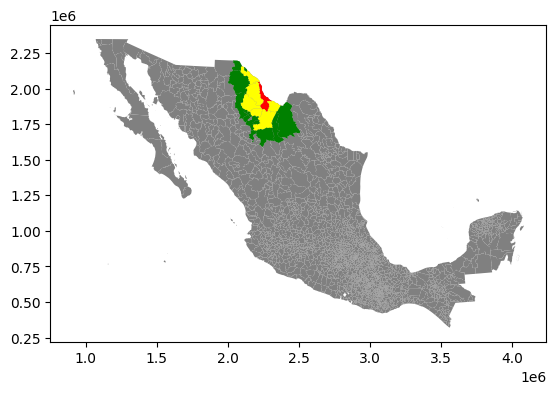

In [13]:
# testing:
ax = municipal_data.geometry.plot(color='gray')

mun_id_to_analyze = municipal_data.sample(1).index[0]
neighbours1 = nx.descendants_at_distance(neighbours_graph, mun_id_to_analyze, 1)
neighbours2 = nx.descendants_at_distance(neighbours_graph, mun_id_to_analyze, 2)

municipal_data.loc[[mun_id_to_analyze]].geometry.plot(ax=ax, color='red')
municipal_data.loc[list(neighbours1)].geometry.plot(ax=ax, color='yellow')
municipal_data.loc[list(neighbours2)].geometry.plot(ax=ax, color='green')

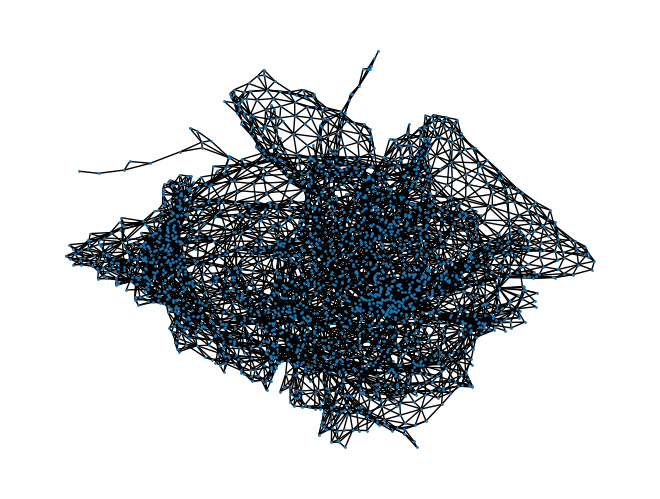

In [14]:
nx.draw(neighbours_graph, node_size=1)

# Conclusion

In [15]:
graph_file = join_paths(general_path, INTERIM_DATA_PATH, GRAPH_FILE)

save_as_pickle(what=neighbours_graph, where=graph_file)